# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv("<data_path_here>") 
df.head()

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv(r'C:\Users\Tombra\deployment\data.csv')

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [3]:

# Check for null values in each column
null_columns = df.columns[df.isnull().any()]

# Print the columns with null values
print("Columns with null values:")
for column in null_columns:
    print(column)

Columns with null values:
Gender
Married
Dependents
Self_Employed
LoanAmount
Loan_Amount_Term
Credit_History


In [4]:
#check the amount of missing numbers in the columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [5]:
#basic statistics for numerical variables
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [11]:
# Count occurrences of value 1 in the "credit_history" column as 1 represents having credit history
credit_history_yes = df["Credit_History"][df["Credit_History"] == 1].value_counts()

# Print the count of value 1

print(credit_history_yes)


1.0    475
Name: Credit_History, dtype: int64


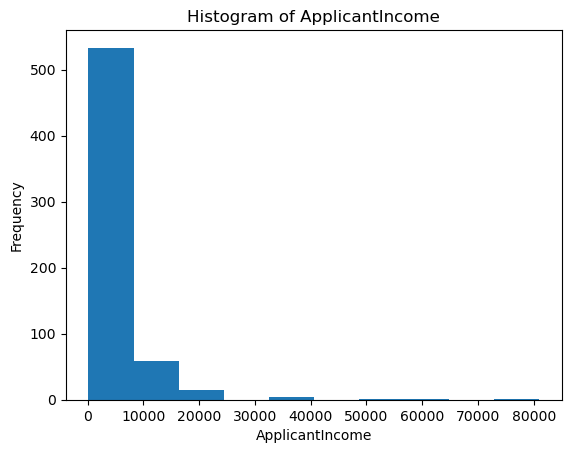

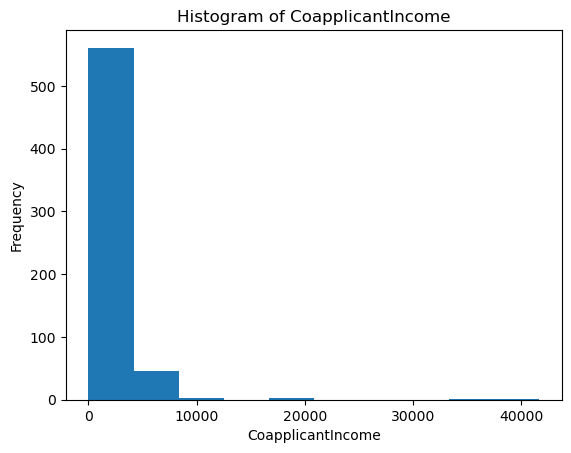

In [12]:
# Select the columns for which you want to plot the histogram
columns = ['ApplicantIncome', 'CoapplicantIncome']

# Plot histograms for each column
for column in columns:
    plt.hist(df[column], bins=10)  # Adjust the number of bins as needed
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    plt.show()


Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [13]:
#Unique values in categorical variables
unique_values = df[['Gender', 'Married', 'Property_Area', 'Education', 'Loan_Status']].nunique()
print(unique_values)


Gender           2
Married          2
Property_Area    3
Education        2
Loan_Status      2
dtype: int64


In [14]:
#get the actual unique variables

unique_values_gender = df['Gender'].unique()
unique_values_married = df['Married'].unique()
unique_values_property_area = df['Property_Area'].unique()
unique_values_education = df['Education'].unique()
unique_values_loan_status = df['Loan_Status'].unique()

print("Unique values in Gender:", unique_values_gender)
print("Unique values in Married:", unique_values_married)
print("Unique values in Property Area:", unique_values_property_area)
print("Unique values in Education:", unique_values_education)
print("Unique values in Loan Status:", unique_values_loan_status)

Unique values in Gender: ['Male' 'Female' nan]
Unique values in Married: ['No' 'Yes' nan]
Unique values in Property Area: ['Urban' 'Rural' 'Semiurban']
Unique values in Education: ['Graduate' 'Not Graduate']
Unique values in Loan Status: ['Y' 'N']


Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

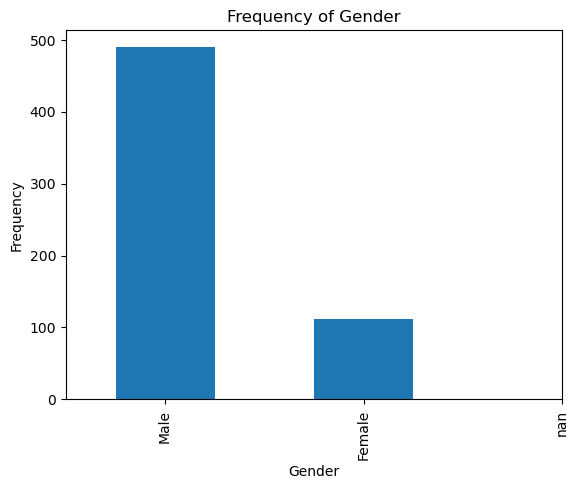

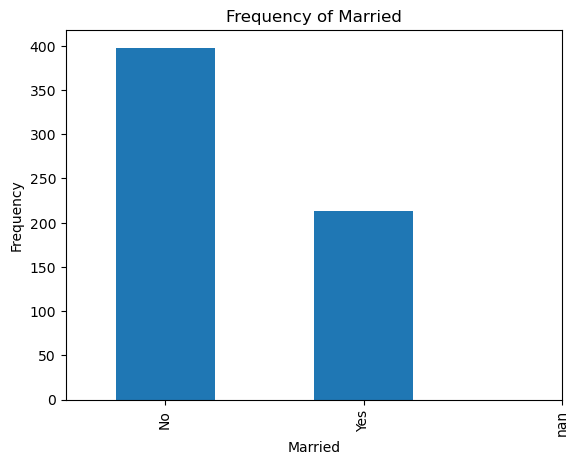

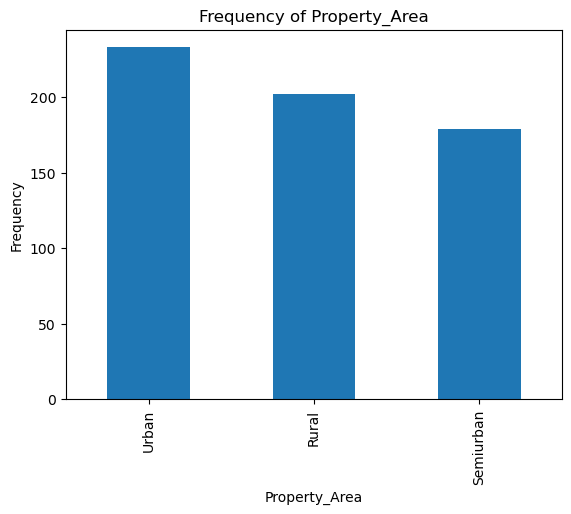

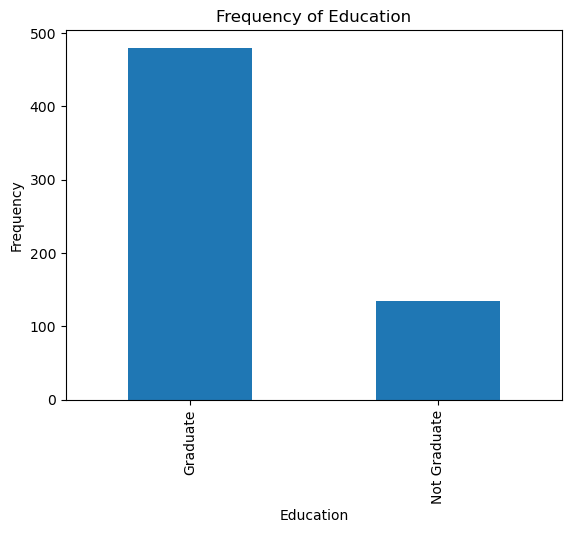

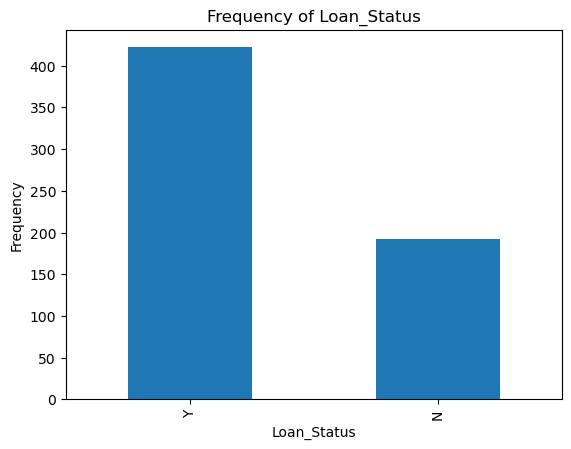

In [15]:
# using frequency to understand the categorical variables

import matplotlib.pyplot as plt

def plot_frequency(column_name, unique_values):
    frequencies = df[column_name].value_counts()
    frequencies.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title('Frequency of {}'.format(column_name))
    plt.xticks(range(len(unique_values)), unique_values)
    plt.show()

plot_frequency('Gender', unique_values_gender)
plot_frequency('Married', unique_values_married)
plot_frequency('Property_Area', unique_values_property_area)
plot_frequency('Education', unique_values_education)
plot_frequency('Loan_Status', unique_values_loan_status)

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



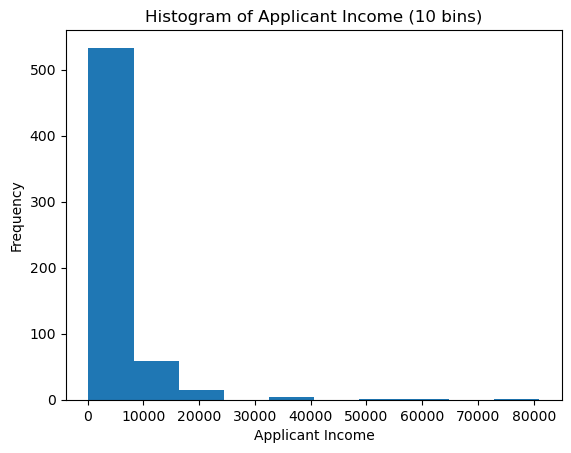

In [16]:
# understanding the applicant income variable using its frequency distribution

import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=10)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income (10 bins)')
plt.show()


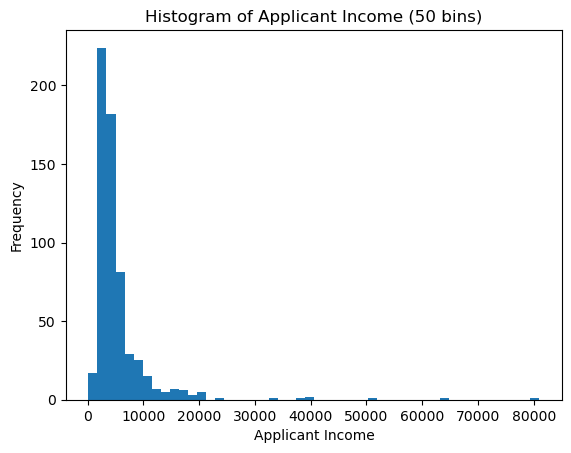

In [17]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=50)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income (50 bins)')
plt.show()

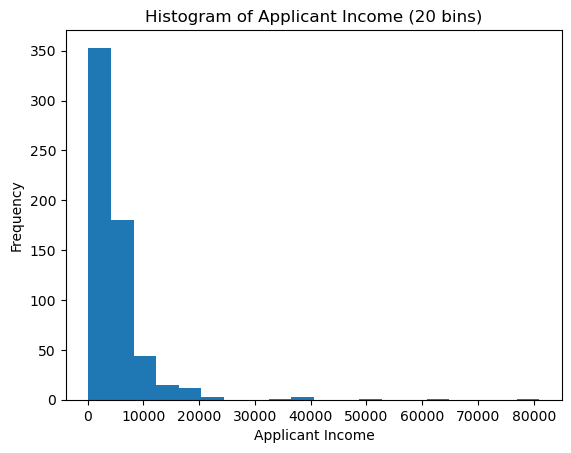

In [18]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=20)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income (20 bins)')
plt.show()

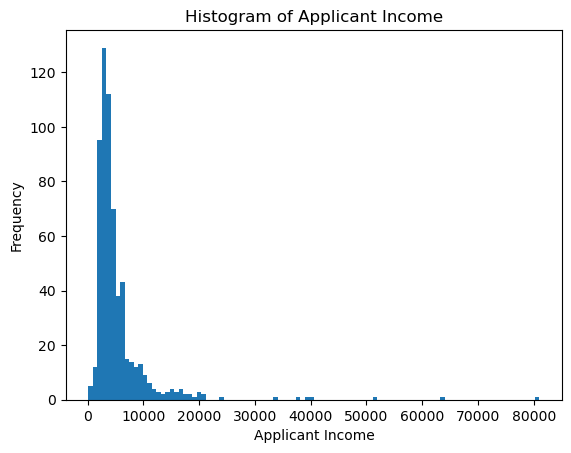

In [19]:
import matplotlib.pyplot as plt

plt.hist(df['ApplicantIncome'], bins=100)
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.title('Histogram of Applicant Income')
plt.show()


Look at box plots to understand the distributions. 

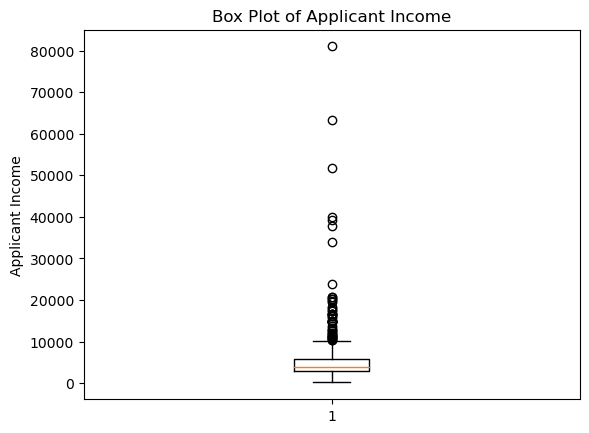

In [20]:
import matplotlib.pyplot as plt

plt.boxplot(df['ApplicantIncome'])
plt.ylabel('Applicant Income')
plt.title('Box Plot of Applicant Income')
plt.show()


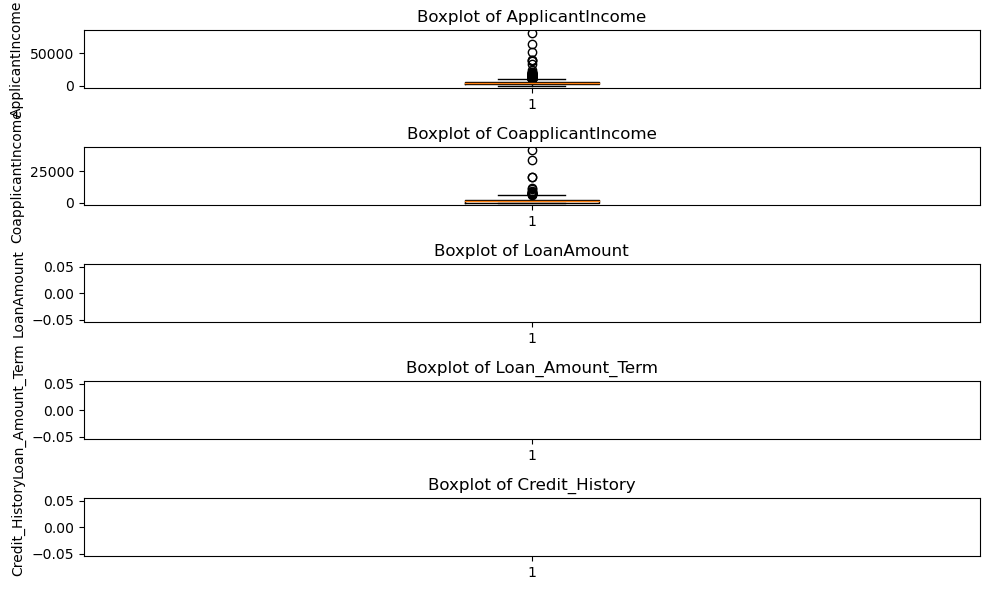

In [21]:
import matplotlib.pyplot as plt

columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

fig, axes = plt.subplots(nrows=len(columns), figsize=(10, 6))

for i, col in enumerate(columns):
    axes[i].boxplot(df[col])
    axes[i].set_ylabel(col)

    # Set title for each subplot
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

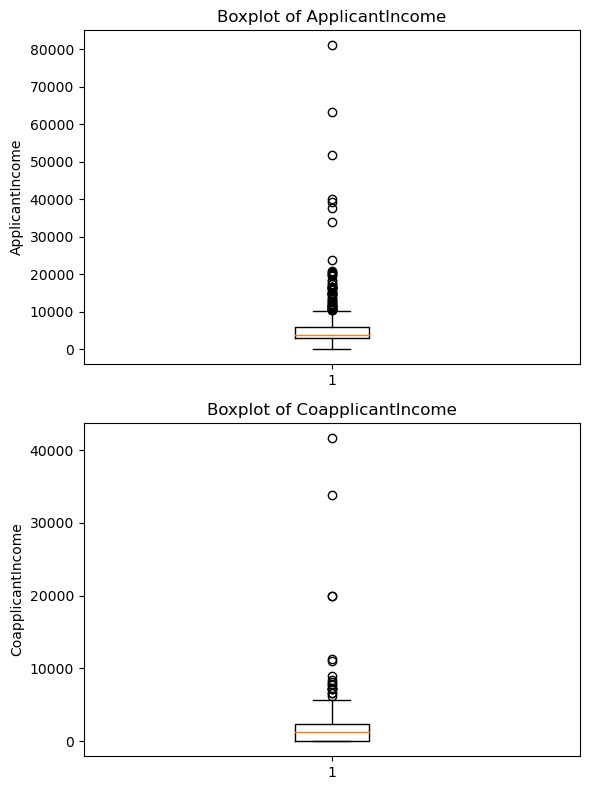

In [22]:
import matplotlib.pyplot as plt

columns = ['ApplicantIncome', 'CoapplicantIncome']

fig, axes = plt.subplots(nrows=len(columns), figsize=(6, 8))

for i, col in enumerate(columns):
    axes[i].boxplot(df[col])
    axes[i].set_ylabel(col)
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()


Look at the distribution of income segregated  by `Education`

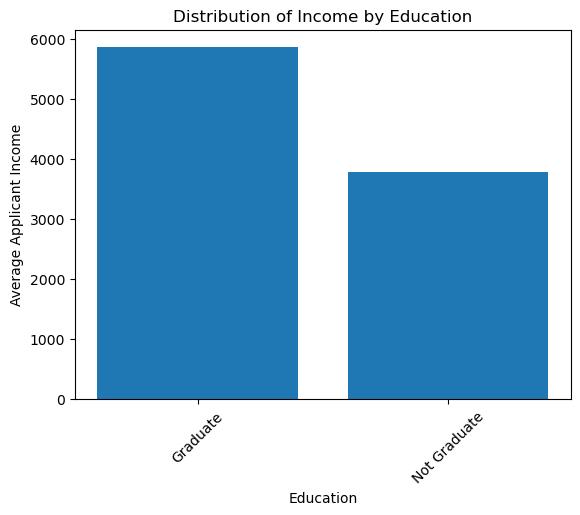

In [23]:
import matplotlib.pyplot as plt

income_by_education = df.groupby('Education')['ApplicantIncome'].mean().sort_values(ascending=False)

plt.bar(income_by_education.index, income_by_education.values)
plt.xlabel('Education')
plt.ylabel('Average Applicant Income')
plt.title('Distribution of Income by Education')
plt.xticks(rotation=45)
plt.show()

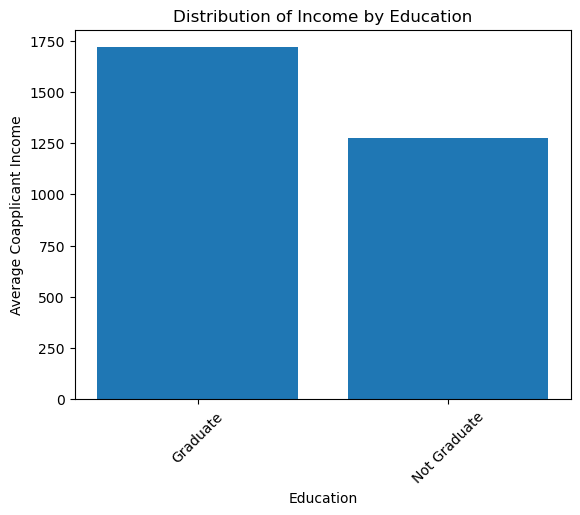

In [24]:
import matplotlib.pyplot as plt

income_by_education = df.groupby('Education')['CoapplicantIncome'].mean().sort_values(ascending=False)

plt.bar(income_by_education.index, income_by_education.values)
plt.xlabel('Education')
plt.ylabel('Average Coapplicant Income')
plt.title('Distribution of Income by Education')
plt.xticks(rotation=45)
plt.show()

Look at the histogram and boxplot of LoanAmount

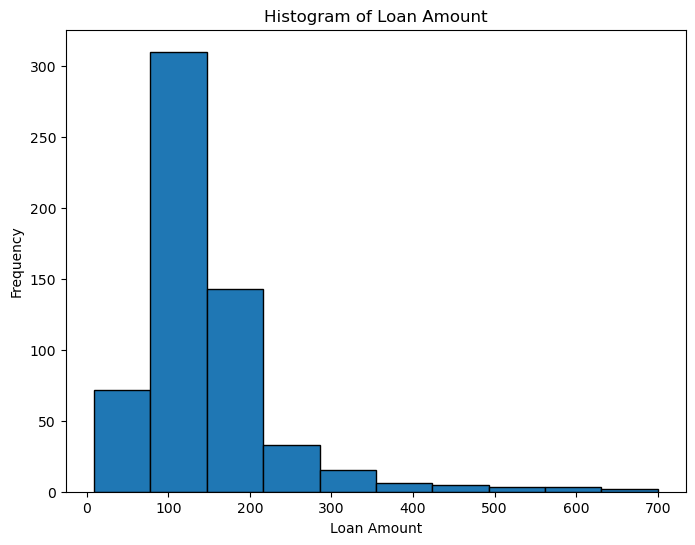

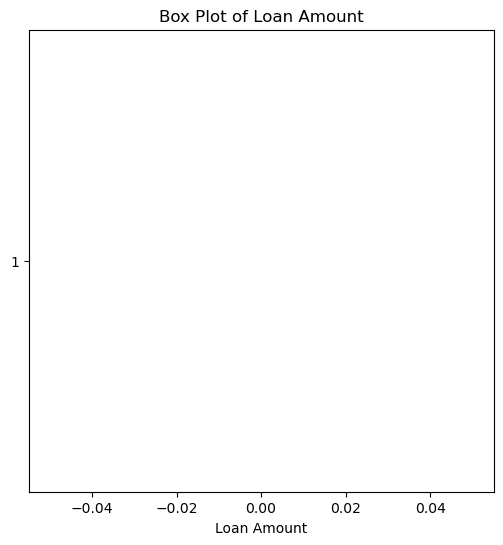

In [25]:
#histogram of loan amount

import matplotlib.pyplot as plt

loan_amount = df['LoanAmount']

# Histogram
plt.figure(figsize=(8, 6))
plt.hist(loan_amount, bins=10, edgecolor='k')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Histogram of Loan Amount')
plt.show()

# Box plot
plt.figure(figsize=(6, 6))
plt.boxplot(loan_amount, vert=False)
plt.xlabel('Loan Amount')
plt.title('Box Plot of Loan Amount')
plt.show()


There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [26]:
import pandas as pd

# Create a pivot table
pivot_table = df.pivot_table(index='Loan_Status', columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], aggfunc='size', fill_value=0)

# Print the pivot table
print(pivot_table)


Gender          Female                                                     \
Married             No                                                      
Education     Graduate                                       Not Graduate   
Self_Employed       No                   Yes                           No   
Property_Area    Rural Semiurban Urban Rural Semiurban Urban        Rural   
Loan_Status                                                                 
N                    3         9     7     1         2     0            2   
Y                   10        12    12     0         3     2            2   

Gender                                   ...     Male                        \
Married                                  ...      Yes                         
Education                                ... Graduate                         
Self_Employed                       Yes  ...       No   Yes                   
Property_Area Semiurban Urban Semiurban  ...    Urban Rural Semiurb

C:\Users\Tombra\AppData\Local\Temp\ipykernel_31120\3780954738.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['Loan_Status'] = pd.Categorical(categorical_df['Loan_Status'])


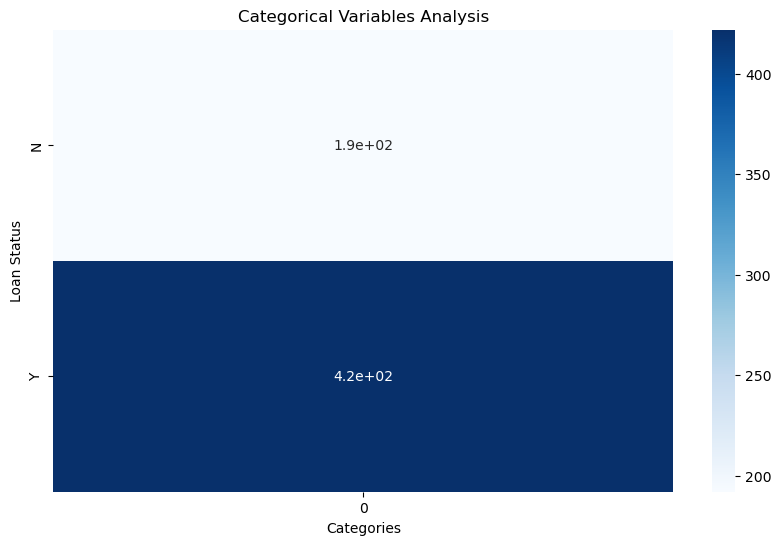

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the categorical columns
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

# Create a subset of the DataFrame with only the categorical columns
categorical_df = df[categorical_columns]

# Convert Loan_Status column to categorical type if needed
categorical_df['Loan_Status'] = pd.Categorical(categorical_df['Loan_Status'])

# Create a pivot table
pivot_table = categorical_df.pivot_table(index='Loan_Status', aggfunc='size', fill_value=0)

# Plot the pivot table as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table.to_frame(), annot=True, cmap='Blues')
plt.title('Categorical Variables Analysis')
plt.xlabel('Categories')
plt.ylabel('Loan Status')
plt.show()


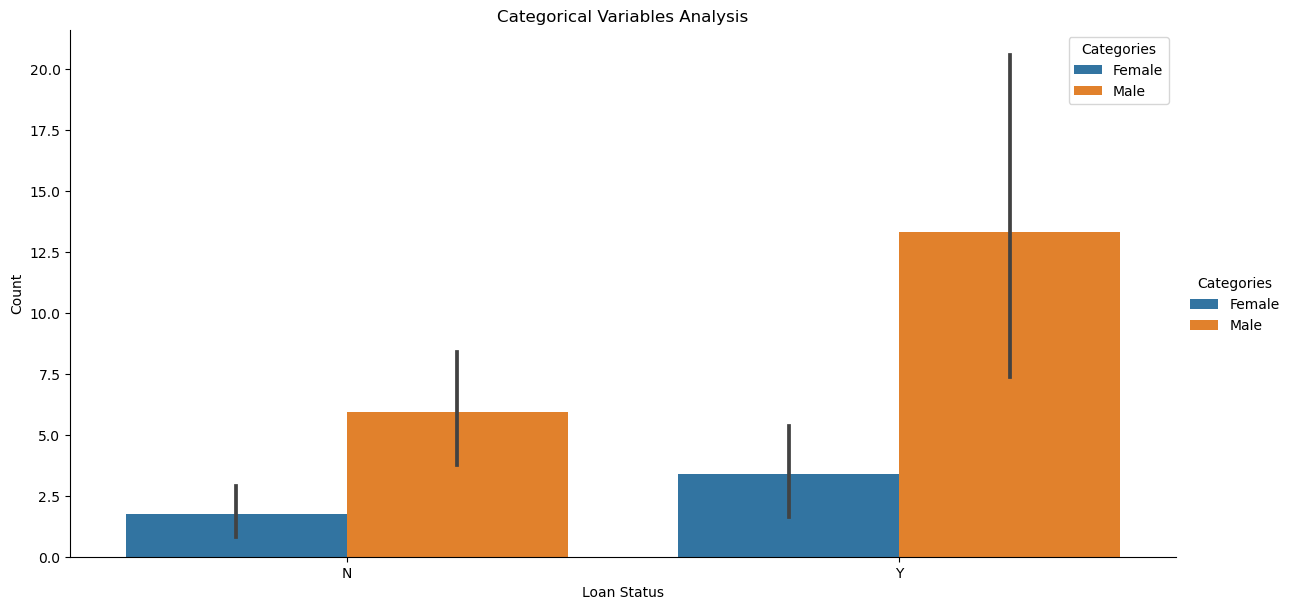

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pivot table
pivot_table = df.pivot_table(index='Loan_Status', columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], aggfunc='size', fill_value=0)

# Convert the pivot table to a DataFrame
pivot_df = pivot_table.reset_index()

# Melt the DataFrame to long format
melted_df = pivot_df.melt(id_vars='Loan_Status', var_name='Categories', value_name='Count')

# Plot the categorical plot
sns.catplot(data=melted_df, x='Loan_Status', y='Count', hue='Categories', kind='bar', height=6, aspect=2)
plt.title("Categorical Variables Analysis")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.legend(title="Categories")
plt.show()


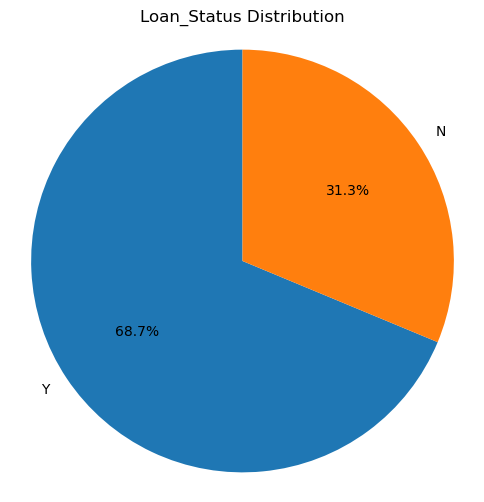

In [29]:
import matplotlib.pyplot as plt

# Select the categorical column
categorical_column = 'Loan_Status'

# Calculate value counts
value_counts = df[categorical_column].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90)
plt.title(categorical_column + ' Distribution')
plt.axis('equal')
plt.show()


## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [30]:
# Fill categorical null values with mode
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Married"].fillna(df["Married"].mode()[0], inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)

# Fill numerical null values with mean
df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(), inplace=True)

In [2]:
# Identify categorical and numerical features
categorical_features = df.select_dtypes(include='object').columns
numerical_features = df.select_dtypes(include=['int', 'float']).columns

# Fill NaN values with mode for categorical features
for feature in categorical_features:
    mode_value = df[feature].mode()[0]
    df[feature].fillna(mode_value, inplace=True)

# Fill NaN values with median for numerical features
for feature in numerical_features:
    median_value = df[feature].median()
    df[feature].fillna(median_value, inplace=True)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

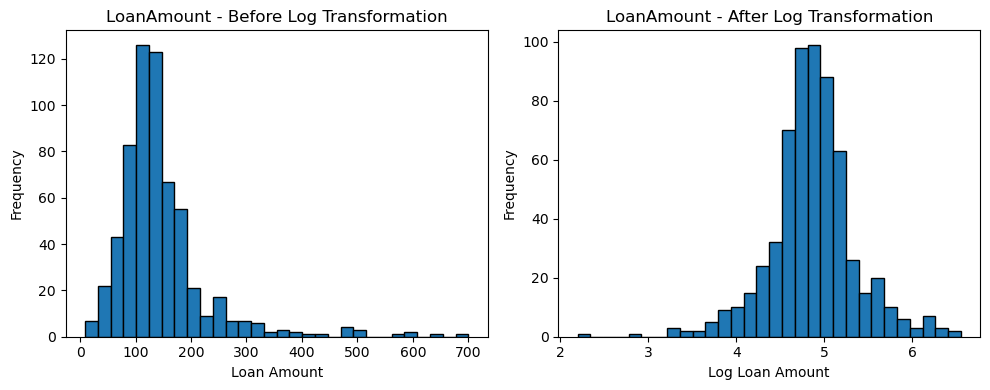

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# Plot histogram before log transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['LoanAmount'].dropna(), bins=30, edgecolor='black')
plt.title('LoanAmount - Before Log Transformation')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Apply log transformation to LoanAmount
df['LoanAmount_log'] = np.log(df['LoanAmount'])

# Plot histogram after log transformation
plt.subplot(1, 2, 2)
plt.hist(df['LoanAmount_log'].dropna(), bins=30, edgecolor='black')
plt.title('LoanAmount - After Log Transformation')
plt.xlabel('Log Loan Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [32]:
# Create a new column 'total_income' by summing 'ApplicantIncome' and 'CoapplicantIncome'
df['Total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

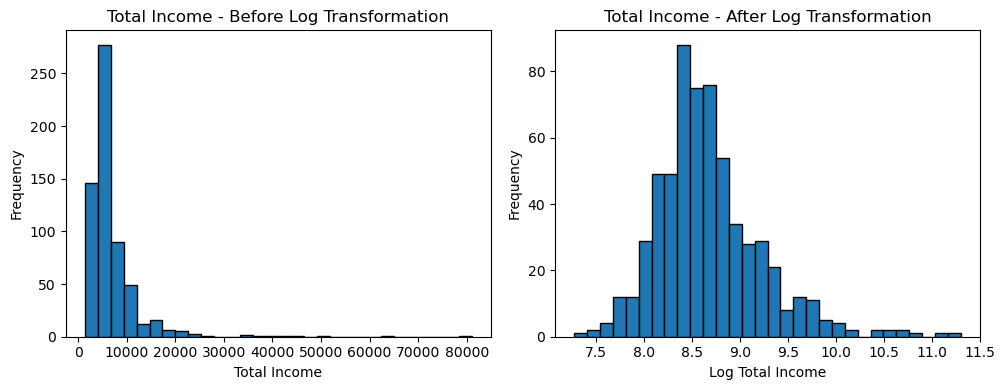

In [33]:



# Plot histogram before log transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(df['Total_income'].dropna(), bins=30, edgecolor='black')
plt.title('Total Income - Before Log Transformation')
plt.xlabel('Total Income')
plt.ylabel('Frequency')

# Apply log transformation to total_income
df['Total_income_log'] = np.log(df['Total_income'])

# Plot histogram after log transformation
plt.subplot(1, 2, 2)
plt.hist(df['Total_income_log'].dropna(), bins=30, edgecolor='black')
plt.title('Total Income - After Log Transformation')
plt.xlabel('Log Total Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## 4. Building a Predictive Model

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import pandas as pd

# Load dataset and define the target variable
df = pd.read_csv(r'C:\Users\Tombra\deployment\data.csv')

X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

# Separate numerical and categorical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Convert numerical columns to numeric data type
X[numerical_columns] = X[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Perform scaling on numerical variables and one-hot encoding on categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', StandardScaler(), numerical_columns),
        ('categorical', OneHotEncoder(drop='first'), categorical_columns)
    ])

# Fit and transform the data
X_encoded_scaled = preprocessor.fit_transform(X)

# Handle missing values (NaN values)
imputer = SimpleImputer(strategy='mean')
X_encoded_scaled = imputer.fit_transform(X_encoded_scaled)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded_scaled, y, test_size=0.2, random_state=27, stratify=y)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_pca)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')


Test set accuracy: 0.6910569105691057


Try paramater grid search to improve the results

In [7]:
#Improve model using grid search

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for grid search
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs']
}

# Initialize grid search with logistic regression model
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Train the model using grid search
grid_search.fit(X_train_pca, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Calculate accuracy
acc = accuracy_score(y_test, y_pred)
print(f'Test set accuracy: {acc}')
print("Best parameters found by grid search:")
print(grid_search.best_params_)

Test set accuracy: 0.6910569105691057
Best parameters found by grid search:
{'C': 0.1, 'solver': 'liblinear'}


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [8]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle

class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass

    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

# Load your dataset and define the target variable
df = pd.read_csv(r'C:\Users\Tombra\deployment\data.csv')
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

# Define the raw features to be selected
selected_feats = ['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Gender', 'Self_Employed', 'Property_Area']

# Separate numerical and categorical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Convert numerical columns to numeric data type
X[numerical_columns] = X[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Define the preprocessing steps for numerical and categorical data
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())  # Use MinMaxScaler to ensure non-negative values
])
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_preprocessor, numerical_columns),
        ('categorical', categorical_preprocessor, categorical_columns)
    ])

# Create the feature selector
feature_selector = SelectKBest(score_func=chi2)  # Select features based on chi-square test

# Create the pipeline
pipeline = Pipeline([
    ('raw_feats', RawFeats(feats=selected_feats)),  # Add the RawFeats step with selected feats
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('pca', PCA(n_components=3)),
    ('model', LogisticRegression())
])

# Fit the pipeline on the entire dataset
pipeline.fit(X, y)

# Take a sample row from the dataset
sample_row = X.sample(n=1, random_state=42)

# Predict the probability of being granted a loan for the sample row
probability = pipeline.predict_proba(sample_row)[0][1]

print("Probability of being granted a loan:", probability)


Probability of being granted a loan: 0.7900563392864988


In [ ]:
#import neccessary pluggins
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle

# Load your dataset and define the target variable
df = pd.read_csv(r'C:\Users\Tombra\deployment\data.csv')
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass

    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

# Define the raw features to be selected
selected_feats = ['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Gender', 'Self_Employed', 'Property_Area']

# Separate numerical and categorical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Convert numerical columns to numeric data type
X[numerical_columns] = X[numerical_columns].apply(pd.to_numeric, errors='coerce')



In [ ]:


# Define the preprocessing steps for numerical and categorical data
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())  # Use MinMaxScaler to ensure non-negative values
])
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_preprocessor, numerical_columns),
        ('categorical', categorical_preprocessor, categorical_columns)
    ])

# Create the feature selector
feature_selector = SelectKBest(score_func=chi2)  # Select features based on chi-square test

In [41]:

# Create the main pipeline 
pipeline = Pipeline([
    ('raw_feats', RawFeats(feats=selected_feats)),  # Add the RawFeats step with selected feats
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('pca', PCA(n_components=3)),
    ('model', LogisticRegression())
])

# Define the parameter grid for grid search
param_grid = {
    'feature_selector__k': [1, 2, 3],
    'pca__n_components': [2, 3, 4]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3)
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

pickle.dump( grid_search, open( "model.p", "wb" ) )

Best Parameters: {'feature_selector__k': 2, 'pca__n_components': 2}
Best Score: 0.6872947553004941


c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
18 fits failed out of a total of 27.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Tombra\anaconda3\lib\site-packages\sklearn\pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\Tombra\ana

In [4]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd
import pickle

# Load your dataset and define the target variable
df = pd.read_csv(r'C:\Users\Tombra\deployment\data.csv')
X = df.drop(columns=['Loan_Status', 'Loan_ID'])
y = df['Loan_Status']

class RawFeats:
    def __init__(self, feats):
        self.feats = feats

    def fit(self, X, y=None):
        pass

    def transform(self, X, y=None):
        return X[self.feats]

    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)



# Define the raw features to be selected
selected_feats = ['Married', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Gender', 'Self_Employed', 'Property_Area']

# Separate numerical and categorical columns
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']
categorical_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']

# Convert numerical columns to numeric data type
X[numerical_columns] = X[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Define the preprocessing steps for numerical and categorical data
numerical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())  # Use MinMaxScaler to ensure non-negative values
])
categorical_preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first'))
])

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_preprocessor, numerical_columns),
        ('categorical', categorical_preprocessor, categorical_columns)
    ])

# Create the feature selector
feature_selector = SelectKBest(score_func=chi2)  # Select features based on chi-square test

# Create the pipeline
pipeline = Pipeline([
    ('raw_feats', RawFeats(feats=selected_feats)),  # Add the RawFeats step with selected feats
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('pca', PCA(n_components=3)),
    ('model', LogisticRegression())
])


pipe = pipeline

pipe.fit(X, y)


Pipeline(steps=[('raw_feats', <__main__.RawFeats object at 0x0000027D937FC520>),
                ('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('feature_selector',
                 SelectKBest(score_func=<function chi2 at 0x0000027D937A31C0>)),
                ('pca', PCA(n_components=3)), ('model', LogisticRegression())])

In [10]:
pipe.score(X,y)

0.6921824104234527

In [11]:
#save the model with pickle
pickle.dump( pipe, open( "model1.p", "wb" ) )

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [42]:
import requests
#URL ="http://ec2-34-205-25-49.compute-1.amazonaws.com:5000/scoring"
URL = "http://127.0.0.1:5000/scoring"

json_data = {
    'Gender': 'Male',
    'Married': 'Yes',
    'Dependents': 1,
    'Education': 'Graduate',
    'Self_Employed': 'No',
    'ApplicantIncome': 4583,
    'CoapplicantIncome': 1508,
    'LoanAmount': 128,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': 'Rural',
    'Loan_Status': 'N'
}

# Sending POST request and saving the response as a response object
r = requests.post(url=URL, json=json_data)

print(r.content)

b'[\n    [\n        0.33906717766460914,\n        0.6609328223353909\n    ]\n]\n'
